In [151]:
import re, sys
from collections import Counter
from matplotlib import pyplot
import numpy, pandas
from IPython.display import display, Markdown
import json
import os,fnmatch

In [152]:
def load_word_weights(lexicon_file):

    ## Create a mapping from words to numbers
    word_weights = {}
    with open(lexicon_file) as lexicon_reader:
        for line in lexicon_reader:
            weight, word = line.split(",")
            word=word.rstrip()## split on comma
            word_weights[word] = float(weight) ## convert string to number
    
    return word_weights

In [153]:
word_weights = load_word_weights("bingliu.csv")

In [154]:
## This function applies the word weights to a list of word counts
def score_counts(counter, word_weights):
    ## accumulate word weights in this variable
    score = 0
    
    ## count the words in the passage
    total_tokens = sum(counter.values())
    ## check for empty segments
    if total_tokens == 0:
        return 0
    
    ## for each word, look up its score
    for word in counter.keys():
        if word in word_weights:
            score += word_weights[word] * counter[word]
    return score/total_tokens
#     return score

#longer paragraphs arent overweighted

In [155]:
def load_album(text_file):

    ## Here's an example of a simple pattern defining a word token. 
    word_pattern = re.compile("\w[\w\-\']*\w|\w") ## what matches this?

    ## Now look at the actual documents. We'll create a list with one object per text segment.
    paragraphs = []
    with open(text_file) as json_file:
        data = json.load(json_file)
#         print (type(data))
    ## here's where we actually read the file
#     with open(text_file, encoding="utf-8") as file:
#         print (type(file))
        ## This block reads a file line by line.
        for line in data["songs"]:
#             print (line)
#             print (type(line))
#             print (line[0])
            title=line['title']
            album=line['album']
            line = line['lyrics'].rstrip()
#             print (line)
            tokens = word_pattern.findall(line)
#             print (tokens)
#             ## turn a list into a word->count map
            paragraph_counts = Counter(tokens)
        
#             ## create the paragraph object, with the original text, 
#             ##  the word counts, and the total score.
#             print (line['title'])
            paragraphs.append({'title': title,'album':album,'text': line, 'counts': paragraph_counts,
                               'score': score_counts(paragraph_counts, word_weights) })

    return paragraphs

In [156]:
#for one album
songs = load_album("../Lyrics_Tyler,TheCreator{.Igor.json")

In [157]:
songs

[{'title': 'EARFQUAKE',
  'album': 'IGOR',
  'text': "For real, for real this time\nFor real, for real, for real this time\nBitch, I cannot fall short\nFor real, for real, for real this time (Yeah, yeah)\nFor real, for real, for real this time\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n'Cause you make my earth quake\nOh, you make my earth quake (Earthquake, ooh)\nRiding around, your love be shakin’ me up\nAnd it's making my heart break\n\nDon't leave, it's my fault\nDon't leave, it's my fault\nDon't leave, it's my fault (Girl)\n’Cause when it all comes crashing down I’ll need you\n\n'Cause you make my earth quake\nOh, you make my earth quake\nRiding around, you’re telling me something is bad\nAnd it's making my heart break\n'Cause you make my earth quake, oh, you make my earth quake\n(Earth quake, yeah)\nRiding around, your love be shakin' me up\nAnd it’s making my heart break (You already k

In [158]:
sorted_song = sorted(songs, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_song[0:9]:
    print("{}\n{}".format(song['score'], song['text']))

## ... and the 10 most positive
for song in sorted_song[-10:-1]:
    print("{}\n{}".format(song['score'], song['text']))
    
#smoothing parameter?

-0.03896103896103896
For real, for real this time
For real, for real, for real this time
Bitch, I cannot fall short
For real, for real, for real this time (Yeah, yeah)
For real, for real, for real this time

'Cause you make my earth quake
Oh, you make my earth quake
Riding around, your love be shakin’ me up
And it's making my heart break
'Cause you make my earth quake
Oh, you make my earth quake (Earthquake, ooh)
Riding around, your love be shakin’ me up
And it's making my heart break

Don't leave, it's my fault
Don't leave, it's my fault
Don't leave, it's my fault (Girl)
’Cause when it all comes crashing down I’ll need you

'Cause you make my earth quake
Oh, you make my earth quake
Riding around, you’re telling me something is bad
And it's making my heart break
'Cause you make my earth quake, oh, you make my earth quake
(Earth quake, yeah)
Riding around, your love be shakin' me up
And it’s making my heart break (You already know)

We ain't gotta ball, D. Rose, huh
I don't give a fuck 

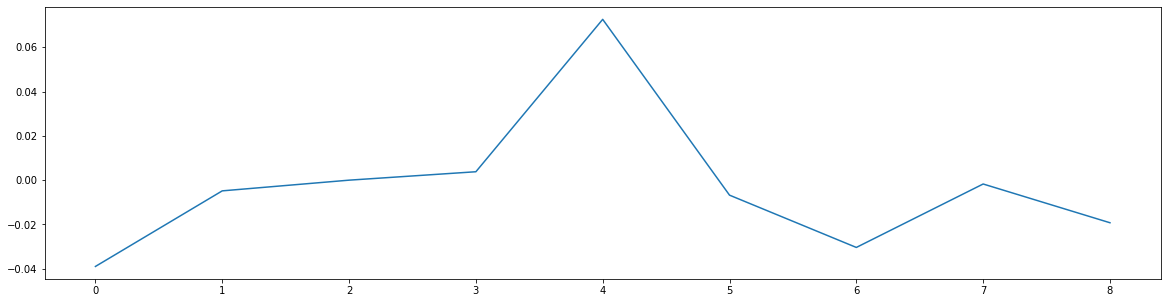

In [159]:
sentiment_scores = numpy.array([p["score"] for p in paragraphs])

pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()

In [160]:
def find_all(name, path):
    l=[]
    for filename in os.listdir(path):
#         print (filename)
        if fnmatch.fnmatch(filename,"*"+name+"*"):
            l.append(filename)
    print (l)
    return l

In [161]:
#all albums for the artist

def load_artist(artist):
    
    complete=[]
    filenames=find_all(artist,"../")
    
    
    for file in filenames:
         complete.extend(load_album("../"+file))
            
    return complete

In [162]:
# Every song and theire score for one artist in a dictionary
completeartist=load_artist("Tyler,")

['Lyrics_Tyler,TheCreator{.Golbin.json', 'Lyrics_Tyler,TheCreator{.Flower-Boy.json', 'Lyrics_Tyler,TheCreator{.Igor.json', 'Lyrics_Tyler,TheCreator{.Bastard.json', 'Lyrics_Tyler,TheCreator{.Cherry-Bomb.json', 'Lyrics_Tyler,TheCreator{.Wolf.json']


In [163]:
sorted_songs_artist = sorted(completeartist, key=lambda x: x["score"])
#paragraphs are very long, the number of words is proprotional to a larger scores
## Display the 10 most negative
for song in sorted_songs_artist[0:9]:
    print("{}\n{}".format(song['score'], song['text']))




-0.21200750469043153
Oh, shit (Swag)
Three icy ass niggas from Odd Future doin' some crazy shit (Bitch)
By the way, we do punch bitches, huh

I'm swagging bitch (Swag), I'm iced out (Iced out)
Oh, you mad, bitch? (Bitch) 'Cause I'm laying on the couch (Woo)
Smoke a blunt, fuck a bitch in the butt, I'm bossing (Bow, bow)
Don't give a fuck, I never roll Slauson
I'm fly bitch, I should poke you in your eye bitch
Got the burner bitch, bow, bow (Bow)
You dead bitch, I'm hot as fuck
I ain't never cold, but I'm icy bitch (Woo)

My bitch suck dick like she suck dick
My bitch suck dick like she suck dick (Bow, bow, bow)
My bitch suck dick like (What) she suck dick
My bitch suck dick like she suck dick (Bow, bow)

Got the bops in the house, socking bitches in they mouth (Bitch)
See my neck? Iced the fuck out (I'm getting money, nigga)
She at the fucking mall, 40 bitches on my nutsack
I pulled up on a mothafuckin' unicorn (I'm getting ponies, nigga)
Wolf Gang, nigga
Scream that 'till they motherf

In [168]:
## ... and the 10 most positive
for song in sorted_songs_artist[-10:-1]:
    print("\n{}\n{}\n{}\n\n{}".format(song['score'],song['album'],song['title'],song['text']))
    
#smoothing parameter?


0.0037735849056603774
Flower Boy
Garden Shed

Don't kill a rose
Before it could bloom
Fly, baby, fly
Out the cocoon

You don't have to hide
I can smell it in your eyes
That there's something more to say, baby
Them words
Damn, run me back, yeah

If I could, if I could
If you could
Find the words to say
Find the words to say
Find the words
In the garden
Shed
Go

Don't kill a rose
Before it could bloom
Fly, baby, fly
Out the cocoon

Ayo
Garden shed, garden shed, garden shed, garden shed
For the garden
That is where I was hidin'
That was real love I was in
Ain't no reason to pretend
Garden shed, garden shed, garden shed
Garden shed for the garçons
Them feelings that I was guardin'
Heavy on my mind
All my friends lost
They couldn't read the signs
I didn't wanna talk and tell 'em my location
And they ain't wanna walk
Truth is, since a youth kid, thought it was a phase
Thought it'd be like the phrase; "poof," gone
But, it's still goin' on
Big fan of the beige tan
Polka dot nose, how it goes


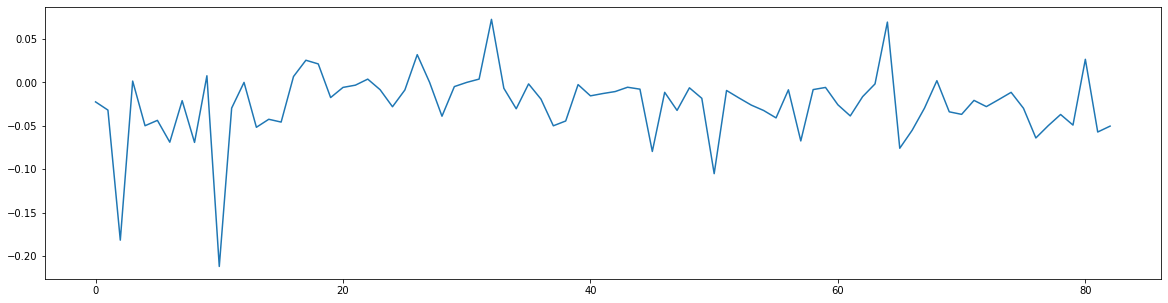

In [169]:
sentiment_scores = numpy.array([p["score"] for p in completeartist])

pyplot.figure(figsize=(20, 5))
pyplot.plot(sentiment_scores)
pyplot.show()

Next Steps?-
playcount vs sentiment score for top 10 scores